In [ ]:
import zipfile
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt



df_zip=zipfile.ZipFile("/content/titanic.zip")

veri=pd.read_csv(df_zip.open("titanic/train.csv"))
veri=veri.drop(columns="PassengerId")
veri


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
veri=veri.drop(columns="Cabin")
veri["Age"]=veri["Age"].fillna(veri["Age"].mean())
veri["Embarked"]=veri["Embarked"].fillna(veri["Embarked"].mode()[0])
veri

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [ ]:
veri.isnull().sum()/veri.shape[0]*100

,0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0
Embarked,0.0


In [ ]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [ ]:
veri["Title"]=veri["Name"].str.split(".").str.get(0)
veri["Title"]=veri["Title"].str.split(",").str.get(1)
veri["Title"]=veri["Title"].str.strip()
veri["Title"]

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [ ]:
veri.groupby("Title").count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Title,,,,,,,,,,
Capt,1,1,1,1,1,1,1,1,1,1
Col,2,2,2,2,2,2,2,2,2,2
Don,1,1,1,1,1,1,1,1,1,1
Dr,7,7,7,7,7,7,7,7,7,7
Jonkheer,1,1,1,1,1,1,1,1,1,1
Lady,1,1,1,1,1,1,1,1,1,1
Major,2,2,2,2,2,2,2,2,2,2
Master,40,40,40,40,40,40,40,40,40,40
Miss,182,182,182,182,182,182,182,182,182,182


In [ ]:
frtitle=["Don", "Dona", "Mme", "Ms", "Mra", "Mlle"]
engtitle=["Mr", "Mrs", "Mrs", "Mrs", "Mrs", "Miss"]


#fransıca ünvanları ingilizceye çeviriyoruz
for i in range(len(frtitle)):
  for j in range(len(engtitle)):
    if i==j:
      veri["Title"]=veri["Title"].str.replace(frtitle[i], engtitle[j])

veri.groupby("Title").count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Title,,,,,,,,,,
Capt,1,1,1,1,1,1,1,1,1,1
Col,2,2,2,2,2,2,2,2,2,2
Dr,7,7,7,7,7,7,7,7,7,7
Jonkheer,1,1,1,1,1,1,1,1,1,1
Lady,1,1,1,1,1,1,1,1,1,1
Major,2,2,2,2,2,2,2,2,2,2
Master,40,40,40,40,40,40,40,40,40,40
Miss,184,184,184,184,184,184,184,184,184,184
Mr,518,518,518,518,518,518,518,518,518,518


In [ ]:
#Ünvanları 5'e düşürüyoruz. En çok olanları alıp diğerlerini "Others"a atıyoruz.

veri["Title"]=veri["Title"].apply(lambda x:x if x in ["Mr", "Miss", "Mrs", "Master"] else "Others")
veri=veri.drop(columns=["Name", "Ticket"])
veri


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.000000,1,0,7.2500,S,Mr
1,1,1,female,38.000000,1,0,71.2833,C,Mrs
2,1,3,female,26.000000,0,0,7.9250,S,Miss
3,1,1,female,35.000000,1,0,53.1000,S,Mrs
4,0,3,male,35.000000,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Others
887,1,1,female,19.000000,0,0,30.0000,S,Miss
888,0,3,female,29.699118,1,2,23.4500,S,Miss
889,1,1,male,26.000000,0,0,30.0000,C,Mr


In [ ]:
cat=["Pclass", "Sex", "Embarked", "Title"]

le=LabelEncoder()

for i in cat:
  le.fit(veri[i])
  veri[i]=le.transform(veri[i])

veri

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,1,22.000000,1,0,7.2500,2,2
1,1,0,0,38.000000,1,0,71.2833,0,3
2,1,2,0,26.000000,0,0,7.9250,2,1
3,1,0,0,35.000000,1,0,53.1000,2,3
4,0,2,1,35.000000,0,0,8.0500,2,2
...,...,...,...,...,...,...,...,...,...
886,0,1,1,27.000000,0,0,13.0000,2,4
887,1,0,0,19.000000,0,0,30.0000,2,1
888,0,2,0,29.699118,1,2,23.4500,2,1
889,1,0,1,26.000000,0,0,30.0000,0,2


In [ ]:
y=veri["Survived"]
x=veri.drop(columns="Survived")

x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,2,1,22.000000,1,0,7.2500,2,2
1,0,0,38.000000,1,0,71.2833,0,3
2,2,0,26.000000,0,0,7.9250,2,1
3,0,0,35.000000,1,0,53.1000,2,3
4,2,1,35.000000,0,0,8.0500,2,2
...,...,...,...,...,...,...,...,...
886,1,1,27.000000,0,0,13.0000,2,4
887,0,0,19.000000,0,0,30.0000,2,1
888,2,0,29.699118,1,2,23.4500,2,1
889,0,1,26.000000,0,0,30.0000,0,2


In [ ]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.50244517,
         0.58595414,  0.13293584],
       [-1.56610693, -1.35557354,  0.63878901, ...,  0.78684529,
        -1.9423032 ,  1.40654698],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.48885426,
         0.58595414, -1.14067529],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ..., -0.17626324,
         0.58595414, -1.14067529],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -0.04438104,
        -1.9423032 ,  0.13293584],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.49237783,
        -0.67817453,  0.13293584]])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


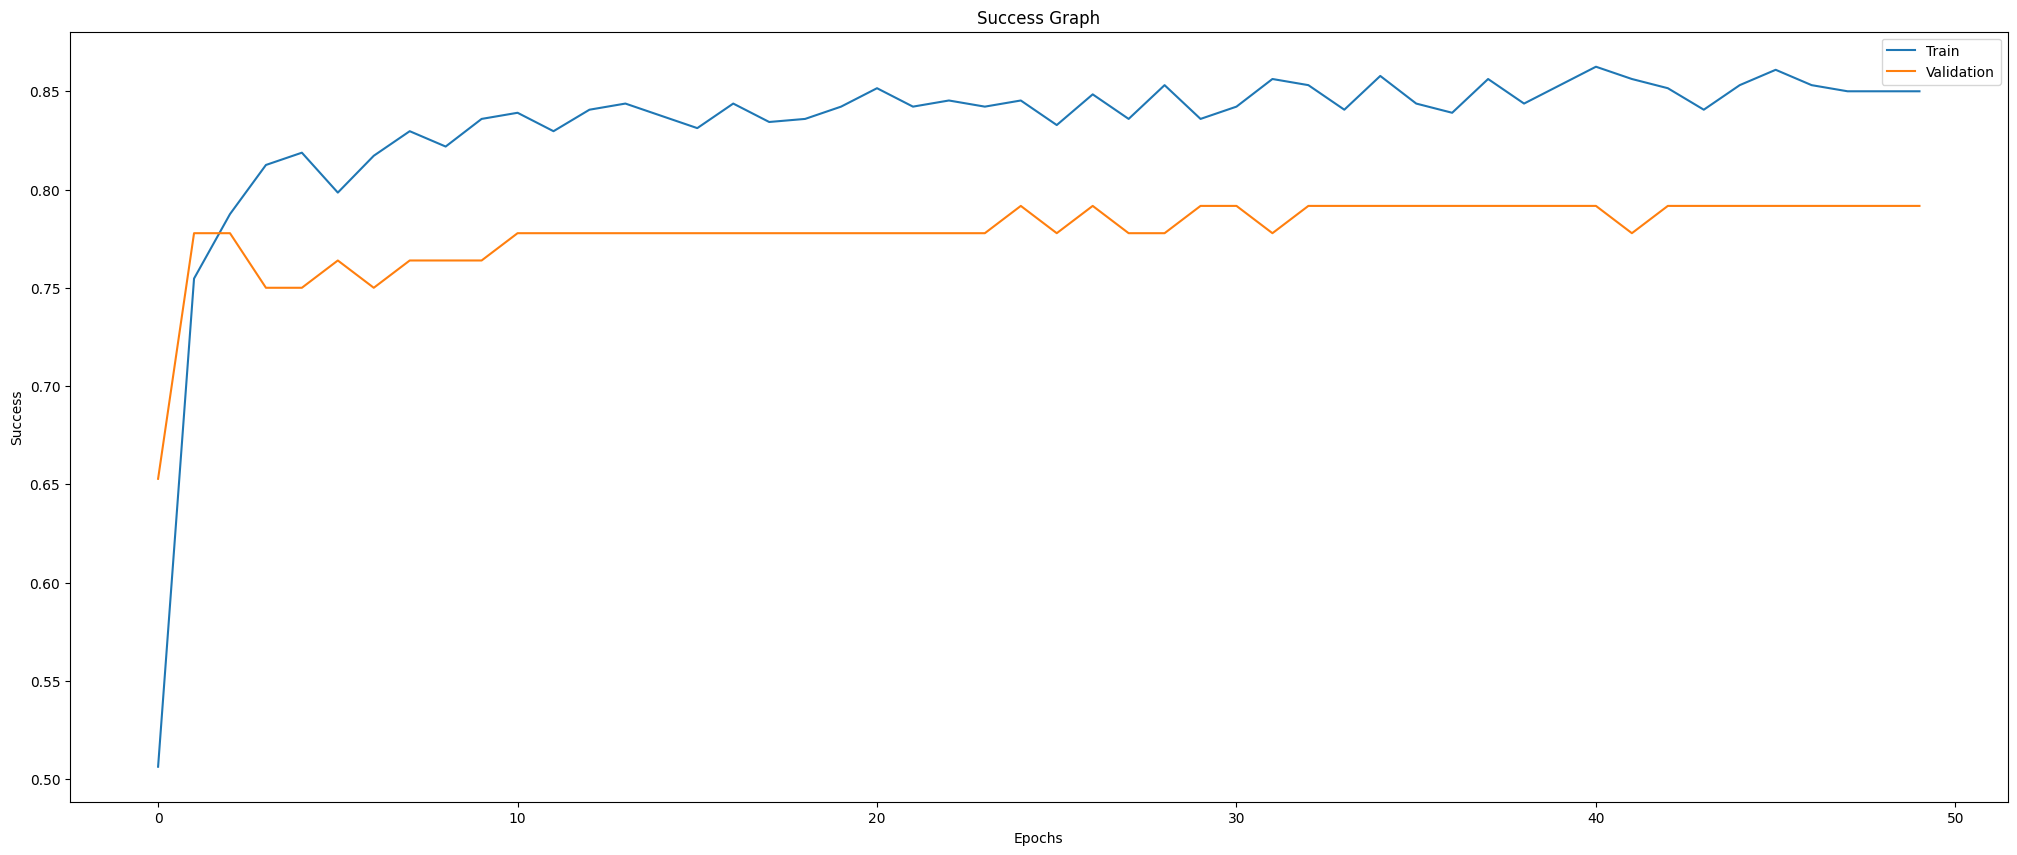

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train, x_val, y_train, y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=0)

model=Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])
output=model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, verbose=0)


plt.figure(figsize=(25,10))
plt.plot(output.history["accuracy"])
plt.plot(output.history["val_accuracy"])
plt.title("Success Graph")
plt.ylabel("Success")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()


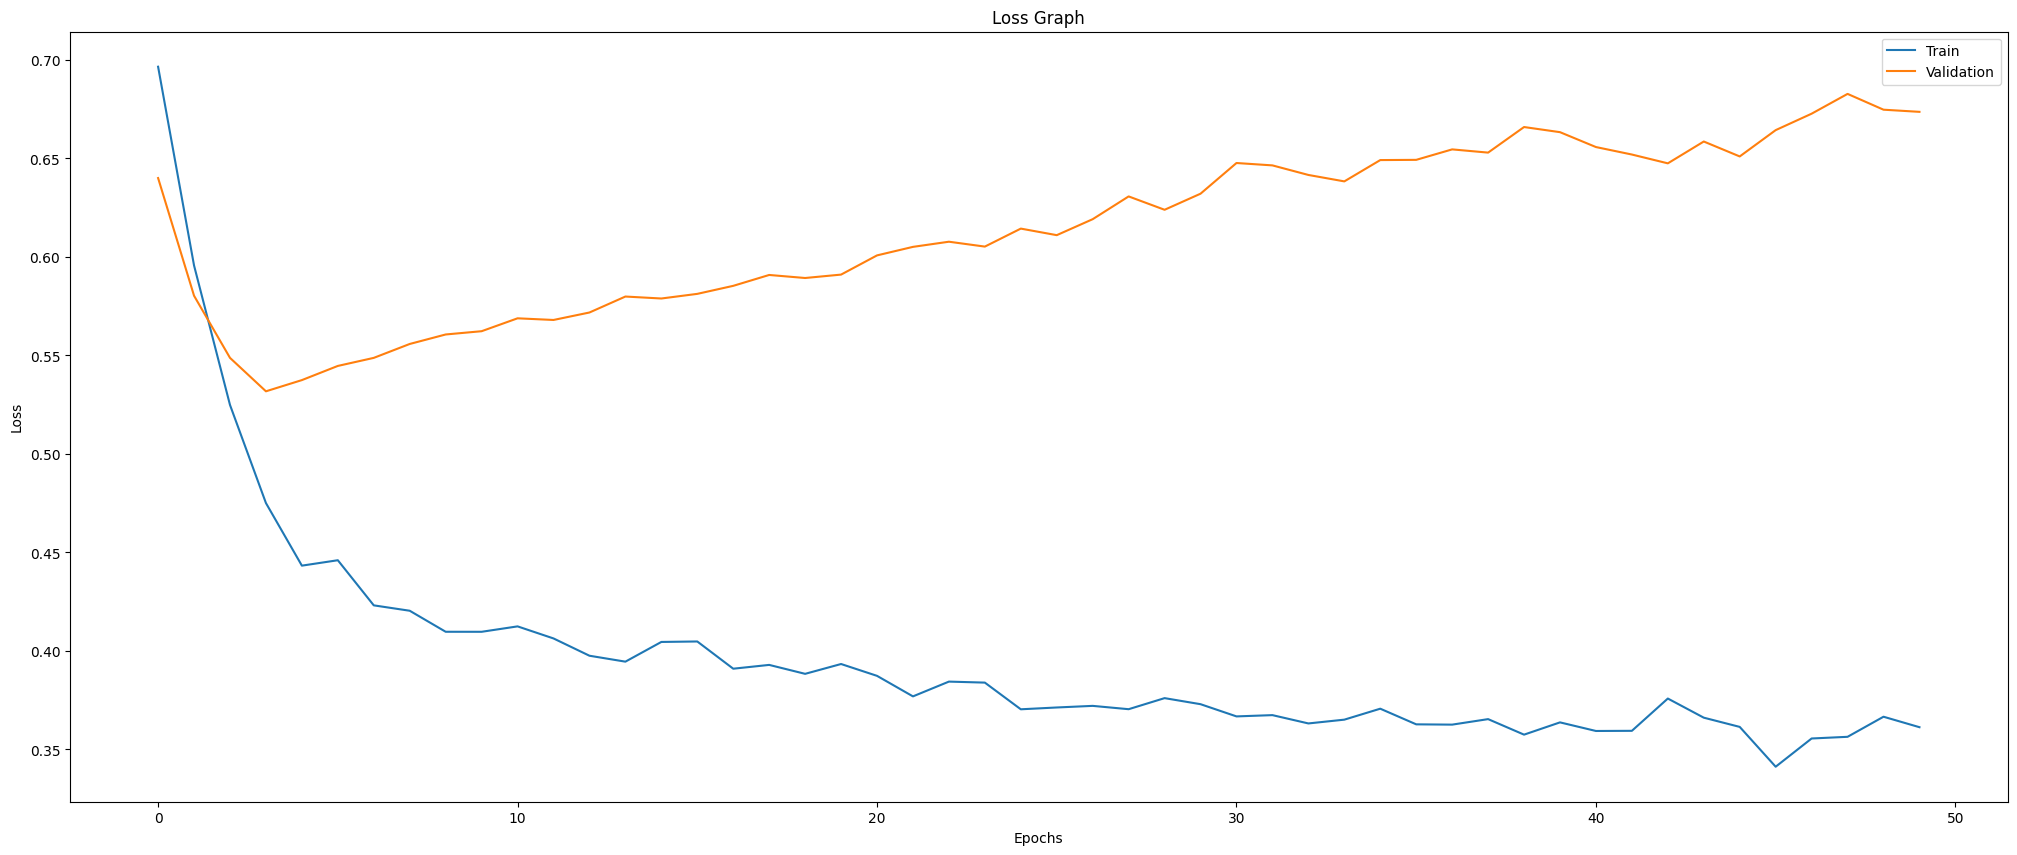

In [ ]:

plt.figure(figsize=(25,10))
plt.plot(output.history["loss"])
plt.plot(output.history["val_loss"])
plt.title("Loss Graph")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()


#model öğrenmemiş ezberlemiş. Overfitting var.
#validation çizgisi de traine yakın olsaydı model öğrenmiş diyebilirdik